In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start=2010-1-1
end=2021-1-1
df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.048642
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.949704
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.952452
2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.498071
2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.424479


In [3]:
df=df.reset_index()


In [4]:
df.head(2)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.048642
1,2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.949704


In [5]:
df=df.drop(['Date','Adj Close',],axis=1)
df.head(2)

,High,Low,Open,Close,Volume
0,7.160714,7.062500,7.125000,7.074286,5.393332e+08
1,7.152143,6.876786,7.116786,6.958571,1.079179e+09


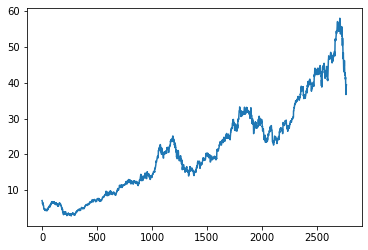

In [6]:
plt.plot(df.Close)

In [7]:
#using rolling function to find the moving avarages
#we find here 100 days moving avarge for stock prediction
ma100=df.Close.rolling(100).mean()
ma100


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2765    51.285075
2766    51.159525
2767    51.029925
2768    50.897825
2769    50.774400
Name: Close, Length: 2770, dtype: float64

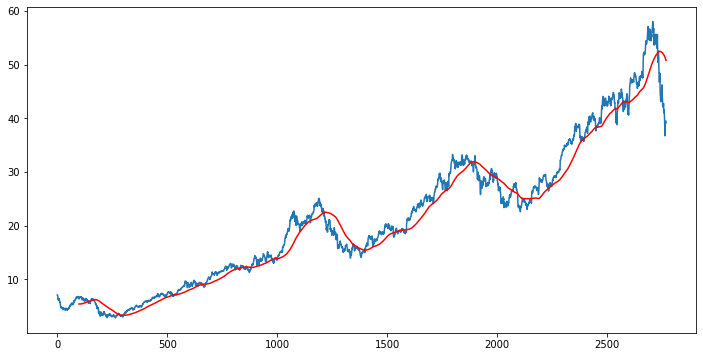

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
#using rolling function to find the moving avarages
#we find here 200 days moving avarge for stock prediction
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2765    48.436525
2766    48.405838
2767    48.376063
2768    48.348300
2769    48.322163
Name: Close, Length: 2770, dtype: float64

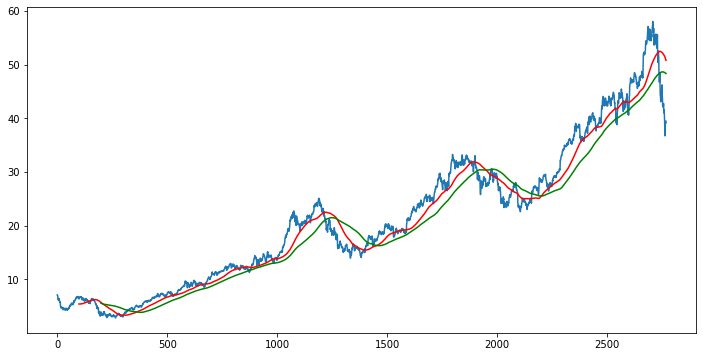

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape

(2770, 5)

In [12]:
#splitting data into training and testing 
#70% data is training data and 30% data is testing data
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1938, 1)
(832, 1)


In [13]:
data_training.head()

,Close
0,7.074286
1,6.958571
2,6.961786
3,6.430357
4,6.344286


In [14]:
data_testing.head()

,Close
1938,28.552500
1939,28.827499
1940,29.070000
1941,29.102501
1942,28.480000


In [15]:
#Now we have to scaling down the data between 0 and 1
#for the stat LSTM model we have to scale down the data, we cant provide this data directly
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.14057225],
       [0.13677297],
       [0.13687853],
       ...,
       [0.83017118],
       [0.81244138],
       [0.83230535]])

In [17]:
data_training_array.shape

(1938, 1)

In [18]:
#now we have to devide data into x_train and y_train

x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [22]:
#Machine learning model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [23]:
model=Sequential()
#1st layer
model.add(LSTM(units=50,activation='relu',return_sequences=True
               ,input_shape=(x_train.shape[1],1)))

model.add(Dropout(0.2))


#2nd layer
model.add(LSTM(units=60,activation='relu',return_sequences=True))

model.add(Dropout(0.3))

#3rd layer
model.add(LSTM(units=80,activation='relu',return_sequences=True))

model.add(Dropout(0.4))

#4th layer
model.add(LSTM(units=120,activation='relu'))

model.add(Dropout(0.5))

#dense layer

model.add(Dense(units=1))




In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
58/58 [==============================] - 19s 223ms/step - loss: 0.0458
Epoch 2/50
58/58 [==============================] - 11s 188ms/step - loss: 0.0094
Epoch 3/50
58/58 [==============================] - 11s 190ms/step - loss: 0.0080
Epoch 4/50
58/58 [==============================] - 10s 171ms/step - loss: 0.0061
Epoch 5/50
58/58 [==============================] - 12s 207ms/step - loss: 0.0063
Epoch 6/50
58/58 [==============================] - 10s 174ms/step - loss: 0.0059
Epoch 7/50
58/58 [==============================] - 10s 178ms/step - loss: 0.0068
Epoch 8/50
58/58 [==============================] - 10s 171ms/step - loss: 0.0057
Epoch 9/50
58/58 [==============================] - 10s 174ms/step - loss: 0.0057
Epoch 10/50
58/58 [==============================] - 10s 172ms/step - loss: 0.0050
Epoch 11/50
58/58 [==============================] - 10s 174ms/step - loss: 0.0053
Epoch 12/50
58/58 [==============================] - 10s 172ms/step - loss: 0.0044
Epoch 13/50
5

In [27]:
model.save('keras_model.h5')

In [29]:
data_training.tail(100)

,Close
1838,31.727501
1839,32.154999
1840,32.417500
1841,32.570000
1842,33.162498
...,...
1933,27.592501
1934,27.317499
1935,28.077499
1936,27.537500


In [28]:
data_testing.head()

,Close
1938,28.552500
1939,28.827499
1940,29.070000
1941,29.102501
1942,28.480000


In [30]:
past_100_days=data_training.tail(100)

In [41]:
final_df=past_100_days.append(data_testing,ignore_index=True)
#final_df=pd.concat((past_100_days, data_testing), axis = 1)


C:\Users\RUSHIKESH\AppData\Local\Temp\ipykernel_5824\3781827968.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [43]:
final_df.head(100)

,Close
0,31.727501
1,32.154999
2,32.417500
3,32.570000
4,33.162498
...,...
95,27.592501
96,27.317499
97,28.077499
98,27.537500


In [44]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.25802586],
       [0.27009099],
       [0.27749946],
       [0.28180342],
       [0.29852532],
       [0.283779  ],
       [0.27023213],
       [0.24560786],
       [0.27241937],
       [0.27065545],
       [0.25019406],
       [0.24462007],
       [0.24638399],
       [0.26303537],
       [0.25386298],
       [0.25068795],
       [0.25167574],
       [0.27241937],
       [0.2711494 ],
       [0.28116844],
       [0.28032179],
       [0.28025117],
       [0.28963522],
       [0.2977492 ],
       [0.27714666],
       [0.29422136],
       [0.29238693],
       [0.28180342],
       [0.28363786],
       [0.27954567],
       [0.28067449],
       [0.27531222],
       [0.27030265],
       [0.2643054 ],
       [0.26162421],
       [0.27192553],
       [0.26987933],
       [0.25986029],
       [0.25809637],
       [0.26289423],
       [0.26077756],
       [0.26486981],
       [0.25583856],
       [0.2629648 ],
       [0.2588725 ],
       [0.26649264],
       [0.26218867],
       [0.256

In [45]:
input_data.shape

(932, 1)

In [47]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [48]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(832, 100, 1)
(832,)


In [49]:
#making predicitions from the test values 

y_predicted= model.predict(x_test)
y_predicted.shape

26/26 [==============================] - 3s 77ms/step


(832, 1)

In [50]:
y_test

array([0.16841883, 0.17618006, 0.18302406, 0.18394133, 0.16637268,
       0.16305651, 0.1754745 , 0.16270376, 0.16919496, 0.17399282,
       0.17194667, 0.15593032, 0.13208213, 0.14083119, 0.1357511 ,
       0.14139561, 0.14421789, 0.14795738, 0.14421789, 0.13518664,
       0.15367251, 0.15000353, 0.15134413, 0.14019616, 0.15183802,
       0.14605237, 0.1509208 , 0.16531432, 0.1652438 , 0.17752065,
       0.20277996, 0.17596839, 0.17081779, 0.2041205 , 0.21301065,
       0.20574332, 0.21759685, 0.22740423, 0.2233825 , 0.21576236,
       0.21675015, 0.21329289, 0.18648133, 0.18182461, 0.17907291,
       0.15522471, 0.16820717, 0.16474991, 0.1901503 , 0.20066323,
       0.20433221, 0.1933959 , 0.20136879, 0.19537148, 0.19381923,
       0.19727654, 0.19050305, 0.18302406, 0.17540393, 0.20242715,
       0.1971354 , 0.19678265, 0.17836735, 0.18224794, 0.1611515 ,
       0.15621255, 0.14217173, 0.14816904, 0.13151771, 0.11070346,
       0.11987585, 0.11917029, 0.1289071 , 0.1248148 , 0.11627

In [51]:
y_predicted

array([[0.18945166],
       [0.18844907],
       [0.18800977],
       [0.18819374],
       [0.18903194],
       [0.19046687],
       [0.19235654],
       [0.19460048],
       [0.19706939],
       [0.19964758],
       [0.20224005],
       [0.2047587 ],
       [0.20708731],
       [0.20905101],
       [0.2105024 ],
       [0.21132222],
       [0.21141881],
       [0.21080679],
       [0.20957528],
       [0.20783256],
       [0.20567667],
       [0.20328861],
       [0.20084251],
       [0.19849485],
       [0.19632219],
       [0.19440508],
       [0.1927794 ],
       [0.19146526],
       [0.190525  ],
       [0.19001196],
       [0.1899848 ],
       [0.19055124],
       [0.19171888],
       [0.19340292],
       [0.19556348],
       [0.1981877 ],
       [0.20120016],
       [0.20454308],
       [0.20817822],
       [0.21200053],
       [0.21587224],
       [0.219717  ],
       [0.22345677],
       [0.2269898 ],
       [0.2302059 ],
       [0.23300606],
       [0.23528561],
       [0.236

In [52]:
scaler.scale_

array([0.02822267])

In [56]:
scale_factor= 1/0.02822267
y_predicted= y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()